In [2]:
# Objective
# Determine which price point (£19.99, £24.99, or £29.99) performs best in terms of conversion rate.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\AB testing\Projects\1 classic AB Test - split test\ab_split_test.csv")

In [3]:
df

,user_id,group,price_shown,conversion
0,1,A,19.99,1
1,2,B,19.99,1
2,3,A,24.99,1
3,4,A,19.99,1
4,5,A,29.99,1
...,...,...,...,...
9995,9996,B,24.99,1
9996,9997,A,24.99,0
9997,9998,B,14.99,1
9998,9999,B,14.99,1


In [4]:
# Basic data summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      10000 non-null  int64  
 1   group        10000 non-null  object 
 2   price_shown  10000 non-null  float64
 3   conversion   10000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [5]:
df.describe()

,user_id,price_shown,conversion
count,10000.00000,10000.00000,10000.000000
mean,5000.50000,20.00200,0.494600
std,2886.89568,7.10668,0.499996
min,1.00000,9.99000,0.000000
25%,2500.75000,14.99000,0.000000
50%,5000.50000,19.99000,0.000000
75%,7500.25000,24.99000,1.000000
max,10000.00000,29.99000,1.000000


In [6]:
# group conversion by price
conversion_by_price = df.groupby('price_shown')['conversion'].agg(['count', 'sum', 'mean']).reset_index()
conversion_by_price.columns = ['price_shown', 'total_users', 'total_conversions', 'conversion_rate']
conversion_by_price


,price_shown,total_users,total_conversions,conversion_rate
0,9.99,1998,1016,0.508509
1,14.99,2056,1032,0.501946
2,19.99,1908,928,0.486373
3,24.99,2000,963,0.481500
4,29.99,2038,1007,0.494112


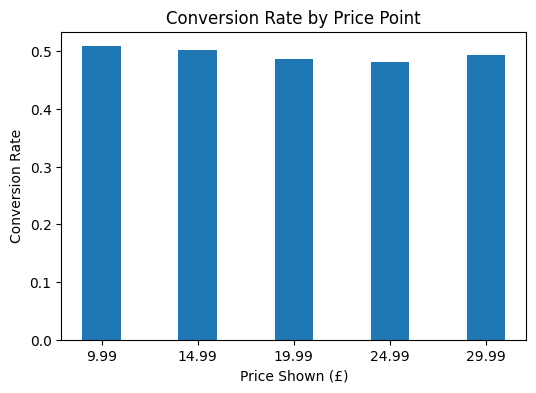

In [7]:
# Visualize conversion rate
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(conversion_by_price['price_shown'].astype(str), conversion_by_price['conversion_rate'], width=0.4)
plt.xlabel('Price Shown (£)')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Price Point')
plt.show()


In [8]:
# Statistical Significance Test (Chi-Square or Proportions Z-test)
# Compare £19.99 vs £29.99
group1 = df[df['price_shown'] == 9.99]
group2 = df[df['price_shown'] == 29.99]

count = [group1['conversion'].sum(), group2['conversion'].sum()]
nobs = [group1.shape[0], group2.shape[0]]

stat, pval = proportions_ztest(count, nobs)
pval


0.3604178586906758

In [9]:
# if the p value is less than 0.05 than the difference is statistically significant. I mean the diference in conversion rate
# higher p-value means null hypothesis of not significant conversion rate stands 
# Test out all difference price vs price if there is any significant varaition ( pvalue < 0.05) 

In [10]:
# Calculate highest revenue
df['revenue'] = df['conversion'] * df['price_shown']
revenue_by_price = df.groupby('price_shown')['revenue'].mean().reset_index()
revenue_by_price.columns = ['price_shown', 'revenue_per_user']
revenue_by_price


,price_shown,revenue_per_user
0,9.99,5.080000
1,14.99,7.524163
2,19.99,9.722600
3,24.99,12.032685
4,29.99,14.818415


In [11]:
# Best-performing price in terms of conversion: £X
# Best-performing price in terms of revenue/user: £Y
# Recommendation: Choose £Z based on business goal (growth vs. margin)